<a href="https://colab.research.google.com/github/DikranHachikyan/colab-plamen-yankov/blob/main/SARIMA_GVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bg_gva_sarima.csv to bg_gva_sarima.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bg_gva_sarima.csv']))
df.head()

,date,GVA
0,2010-03-31,899286000
1,2010-06-30,1348475000
2,2010-09-30,1118613000
3,2010-12-31,1297376000
4,2011-03-31,875793000


In [ ]:
df["date"]=pd.to_datetime(df["date"])

In [ ]:
df = df.set_index('date')
df.head(3)

,GVA
date,
2010-03-31,899286000
2010-06-30,1348475000
2010-09-30,1118613000


Text(0.5, 1.0, 'Distribution of GVA')

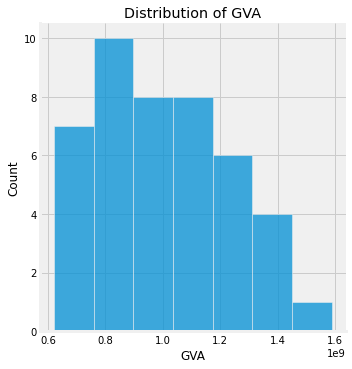

In [ ]:
sns.displot(df['GVA'])
plt.title("Distribution of GVA")

**Finding trend, seasonality, and noise**



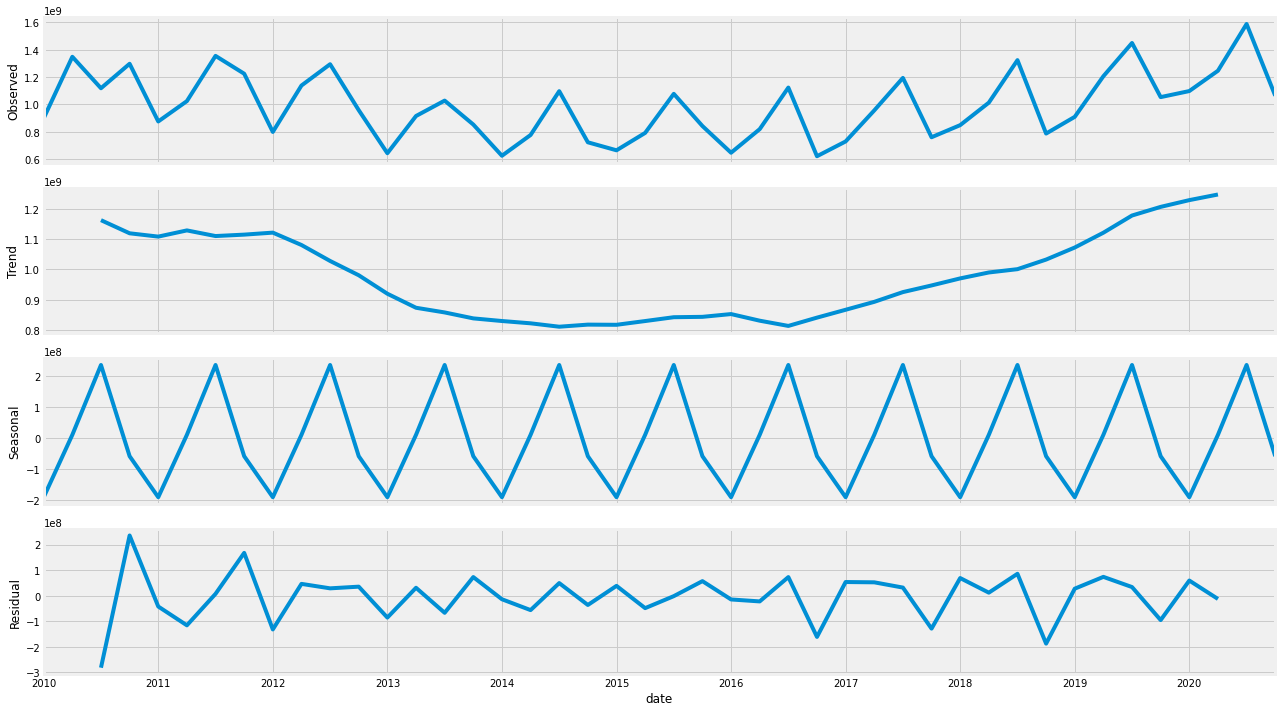

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
 
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
 
print('Examples of parameter combinations for SARIMA..')
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} * {}'.format(pdq[3], seasonal_pdq[2]))

Examples of parameter combinations for SARIMA..
SARIMAX: (0, 0, 1) * (0, 0, 1, 4)
SARIMAX: (0, 0, 1) * (0, 0, 1, 4)
SARIMAX: (0, 1, 0) * (0, 1, 0, 4)
SARIMAX: (0, 1, 1) * (0, 1, 0, 4)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                df,
                order=param, seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}*{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)*(0, 0, 0, 4)4 - AIC:1085863694055782.4
SARIMA(0, 0, 0)*(0, 0, 1, 4)4 - AIC:1704.942322403904
SARIMA(0, 0, 0)*(0, 1, 0, 4)4 - AIC:1577.490665839779
SARIMA(0, 0, 0)*(0, 1, 1, 4)4 - AIC:1413.5455191213746
SARIMA(0, 0, 0)*(1, 0, 0, 4)4 - AIC:1618.6023787289469
SARIMA(0, 0, 0)*(1, 0, 1, 4)4 - AIC:1582.016720152119
SARIMA(0, 0, 0)*(1, 1, 0, 4)4 - AIC:1452.087208142544
SARIMA(0, 0, 0)*(1, 1, 1, 4)4 - AIC:1415.9252678867454
SARIMA(0, 0, 1)*(0, 0, 0, 4)4 - AIC:1838.2664931767486
SARIMA(0, 0, 1)*(0, 0, 1, 4)4 - AIC:1655.8022665908095
SARIMA(0, 0, 1)*(0, 1, 0, 4)4 - AIC:1526.7157532222052
SARIMA(0, 0, 1)*(0, 1, 1, 4)4 - AIC:1367.0493534632506
SARIMA(0, 0, 1)*(1, 0, 0, 4)4 - AIC:1736.864382908882
SARIMA(0, 0, 1)*(1, 0, 1, 4)4 - AIC:1652.1324862729166
SARIMA(0, 0, 1)*(1, 1, 0, 4)4 - AIC:1446.574536908007
SARIMA(0, 0, 1)*(1, 1, 1, 4)4 - AIC:1365.74722721836
SARIMA(0, 1, 0)*(0, 0, 0, 4)4 - AIC:1756.4424314435087
SARIMA(0, 1, 0)*(0, 0, 1, 4)4 - AIC:1576.3213341068242
SARIMA(0, 1, 0)*(0

**Getting stationarity**

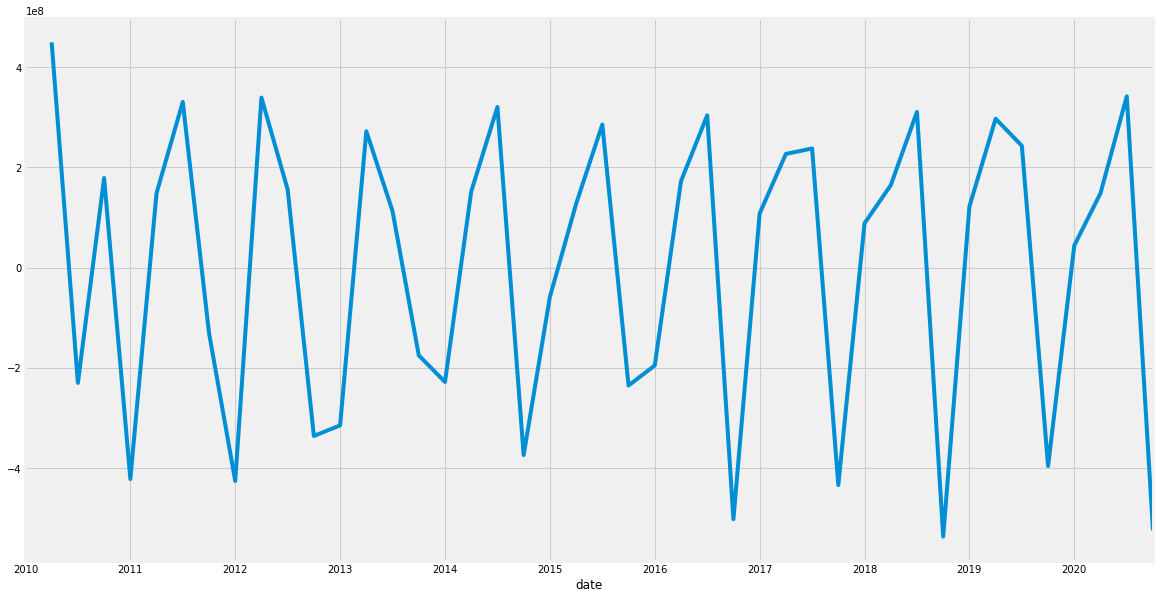

In [ ]:
df['1difference']=df['GVA']-df['GVA'].shift(1)
df['1difference'].plot()

In [ ]:
result=adfuller(df['1difference'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -1.5755433782888713,
 'criticalvalues': {'1%': -3.6327426647230316,
  '10%': -2.6130173469387756,
  '5%': -2.9485102040816327},
 'icbest': 1274.2839092915174,
 'nobs': 35,
 'pvalue': 0.49586614313644073,
 'usedlag': 7}

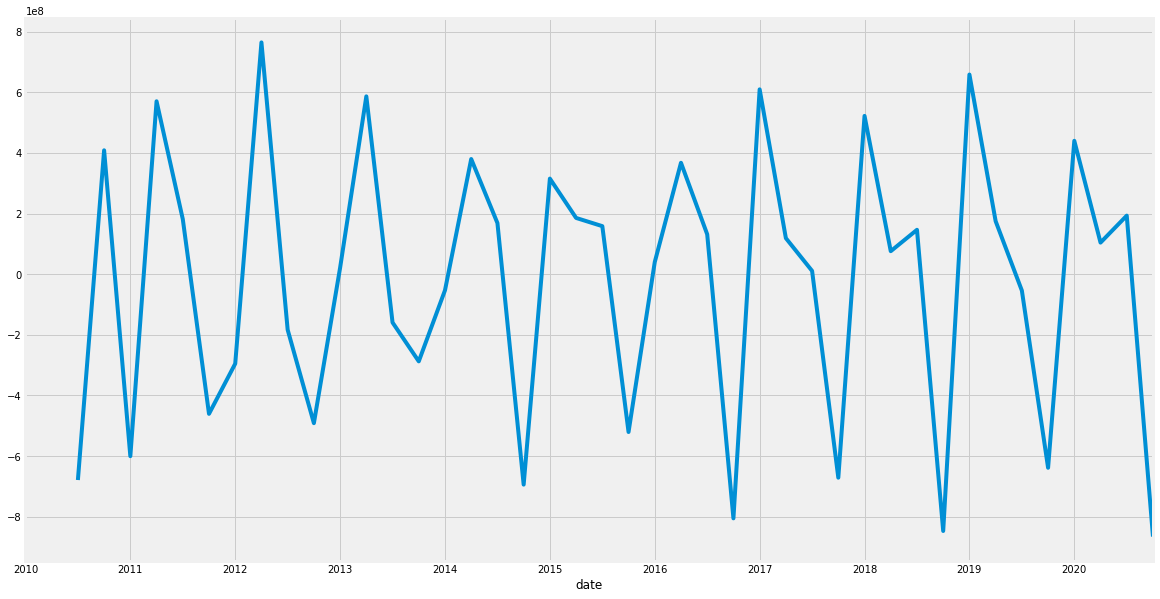

In [ ]:
df['2difference']=df['1difference']-df['1difference'].shift(1)
df['2difference'].plot()

In [ ]:
result=adfuller((df['2difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -3.975432234962058,
 'criticalvalues': {'1%': -3.639224104416853,
  '10%': -2.614446989619377,
  '5%': -2.9512301791166293},
 'icbest': 1233.0173626599492,
 'nobs': 34,
 'pvalue': 0.0015447620924023972,
 'usedlag': 7}

Seasonal stationarity

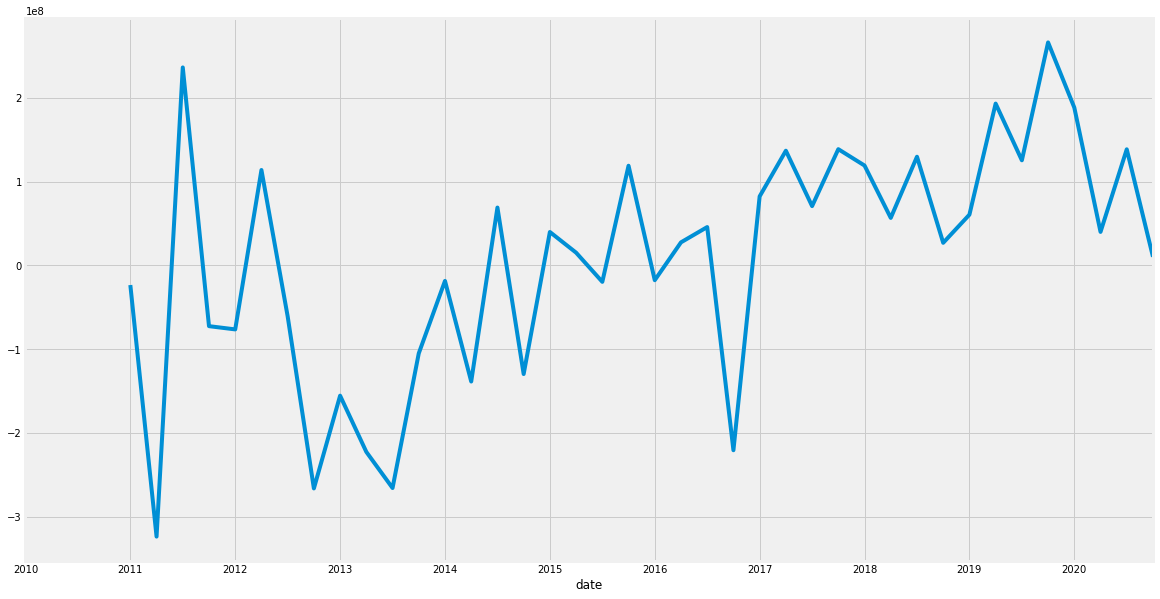

In [ ]:
df['Seasonal_Difference']=df['GVA']-df['GVA'].shift(4)
ax=df['Seasonal_Difference'].plot()

In [ ]:
result=adfuller((df['Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -1.751969129772316,
 'criticalvalues': {'1%': -3.6327426647230316,
  '10%': -2.6130173469387756,
  '5%': -2.9485102040816327},
 'icbest': 1148.861020164652,
 'nobs': 35,
 'pvalue': 0.40455466997217204,
 'usedlag': 4}

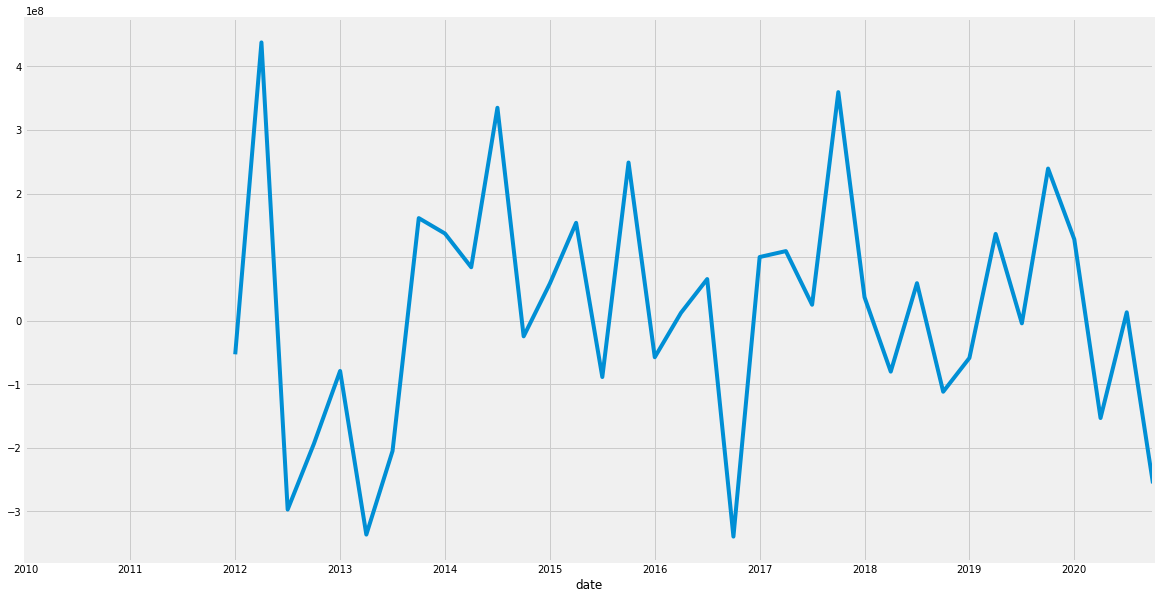

In [ ]:
df['2Seasonal_Difference']=df['Seasonal_Difference']-df['Seasonal_Difference'].shift(4)
ax=df['2Seasonal_Difference'].plot()

In [ ]:
result=adfuller((df['2Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -3.931848499112545,
 'criticalvalues': {'1%': -3.7112123008648155,
  '10%': -2.6300945562130176,
  '5%': -2.981246804733728},
 'icbest': 995.1061429771545,
 'nobs': 26,
 'pvalue': 0.001812568825836053,
 'usedlag': 9}

**Plot the second difference of GVA**

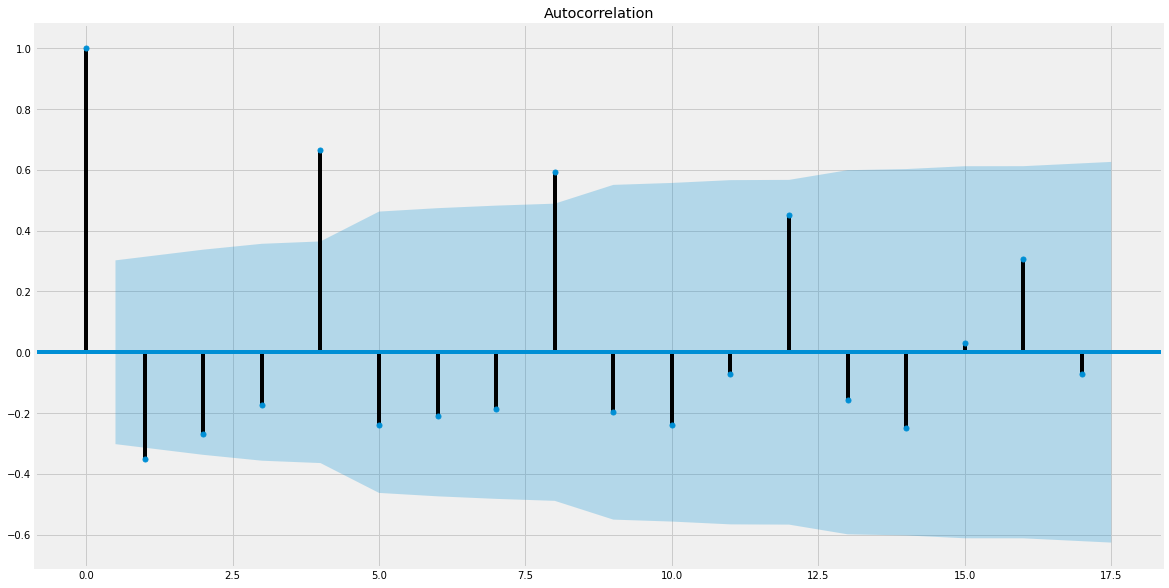

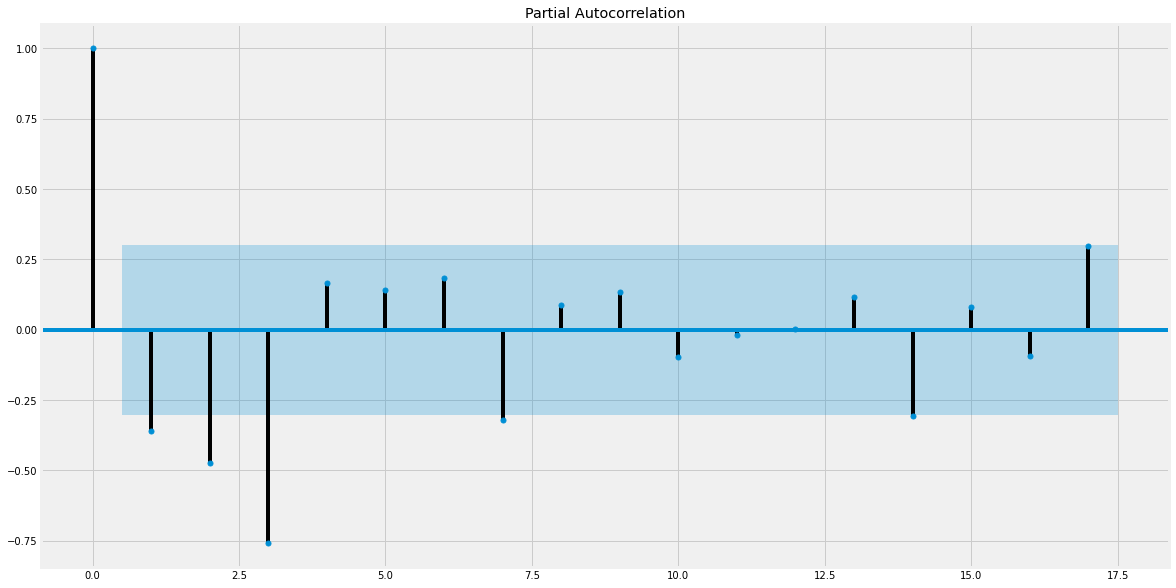

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_acf(df['2difference'].dropna())
fig2=plot_pacf(df['2difference'].dropna())

Plot the seconf Seasonal difference

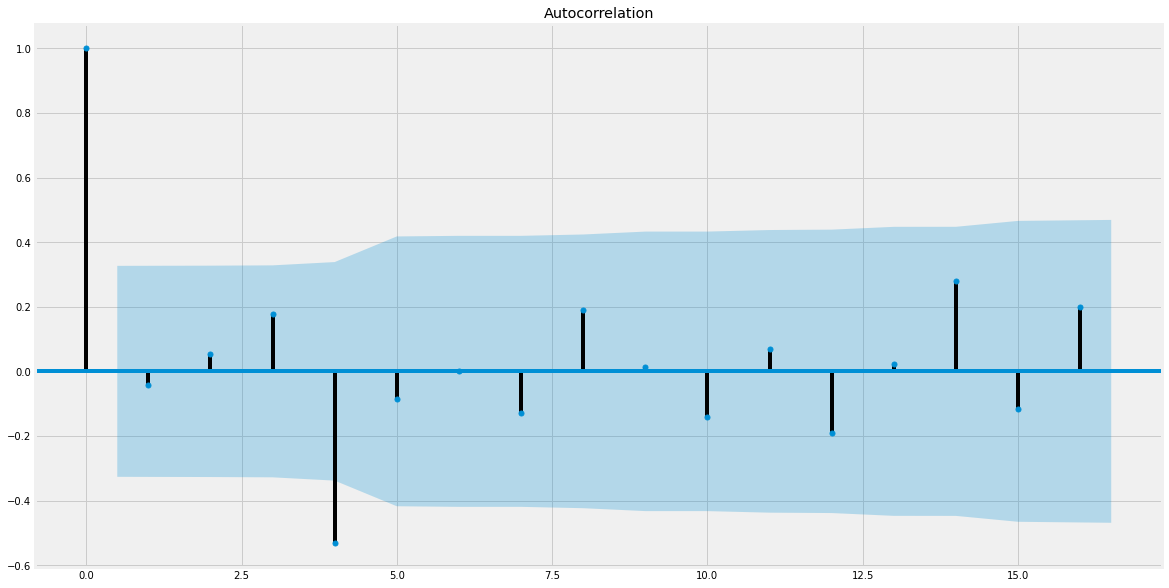

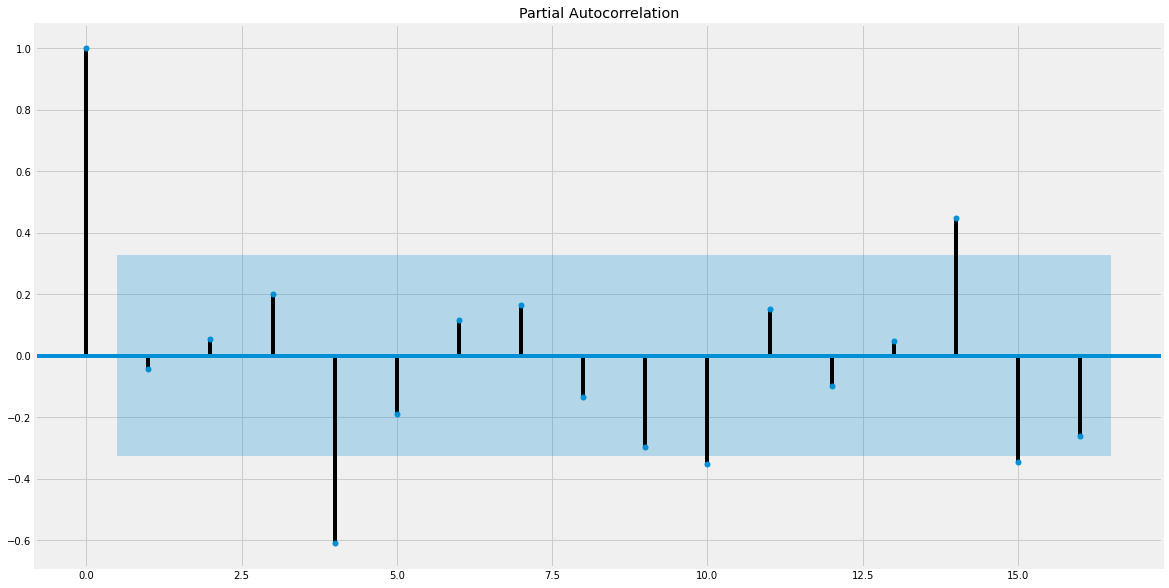

In [ ]:
fig1=plot_acf(df['2Seasonal_Difference'].dropna())
fig2=plot_pacf(df['2Seasonal_Difference'].dropna())

In [ ]:
df.head()

,GVA,1difference,2difference,Seasonal_Difference,2Seasonal_Difference
date,,,,,
2010-03-31,899286000,NaN,NaN,NaN,NaN
2010-06-30,1348475000,449189000.0,NaN,NaN,NaN
2010-09-30,1118613000,-229862000.0,-679051000.0,NaN,NaN
2010-12-31,1297376000,178763000.0,408625000.0,NaN,NaN
2011-03-31,875793000,-421583000.0,-600346000.0,-23493000.0,NaN


Building the SARIMA model based on the smallest AIC

In [ ]:
model=SARIMAX(df['GVA'],order=(1,1,1),seasonal_order=(1, 1, 1, 4))
result=model.fit()

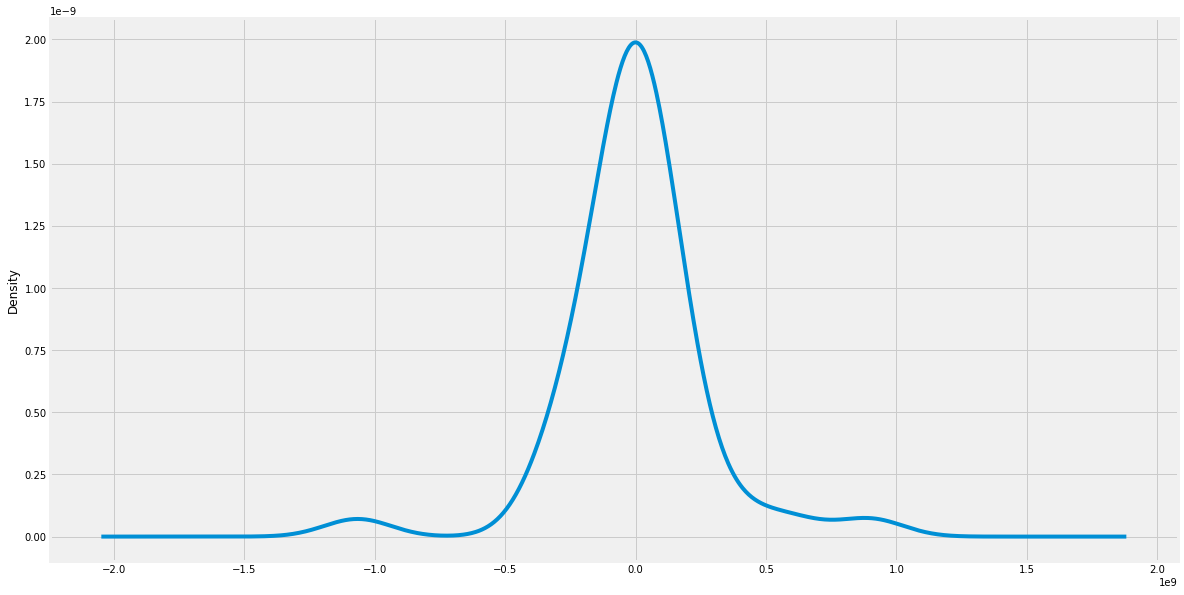

In [ ]:
result.resid.plot(kind='kde')

**Finall check for  coefficients significance**

In [ ]:
best_model = SARIMAX(df['GVA'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                               GVA   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -791.786
Date:                           Mon, 16 Aug 2021   AIC                           1593.572
Time:                                   17:50:36   BIC                           1601.890
Sample:                               03-31-2010   HQIC                          1596.557
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3169      0.215      1.473      0.141      -0.105       0.739
ma.L1         -0.4874      0.205     -2.383

In [ ]:
from pandas.tseries.offsets import DateOffset
new_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24,3)]
df_pred=pd.DataFrame(index=new_dates,columns =df.columns)
df_pred

,GVA,1difference,2difference,Seasonal_Difference,2Seasonal_Difference
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN
2021-09-30,NaN,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN,NaN


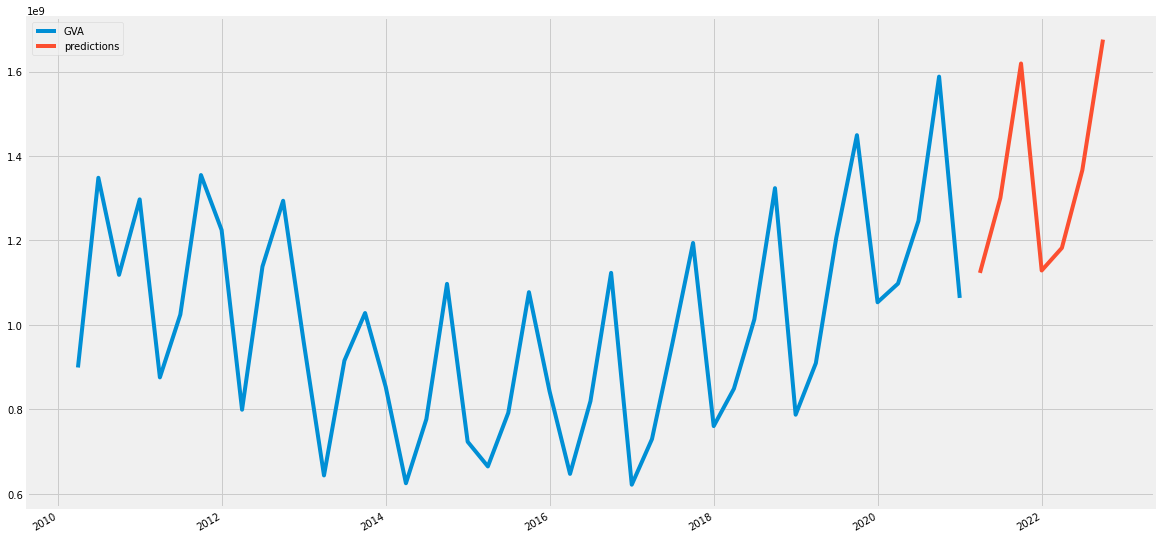

In [ ]:
df2=pd.concat([df,df_pred])
df2['predictions']=result.predict(start=44,end=68)
df2[['GVA','predictions']].plot()

In [ ]:
best_model = SARIMAX(df['GVA'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                               GVA   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -791.786
Date:                           Mon, 16 Aug 2021   AIC                           1593.572
Time:                                   17:50:59   BIC                           1601.890
Sample:                               03-31-2010   HQIC                          1596.557
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3169      0.215      1.473      0.141      -0.105       0.739
ma.L1         -0.4874      0.205     -2.383